In [56]:
#Plot the data for fiber twister paper!!!
#Goals: More pressure readings per twister, check pressure values are valid
#using a pressure gauge and minimize leaks!
#ckh 3-29-17 Includes  k=2 from morning, k=1 from afternoon data
import numpy as np

#For the first set of expts I dialed in a pressure on the EFD and waited for the membrane
#to stop inflating. It leaked. Then I had to go back and calibrate what the actual pressures were.
k2n24Pressures=np.concatenate((np.arange(0.1,3.6,0.1),np.array([3.75,4.0])))
k2n24Angles=90-np.array([80.0,73.6,68.9,65.0,60.5,58.0,49.0,45.0,38.0,27.4,23.0,19.0,14.8,12.2,10.2,8.7,7,5.3,1.9,-0.2,-1.0,0.2,-7.6,-9.8,-13.0,-14.2,-14.4,-16.8,-19.9,-27.2,-26.2,-28.1,-28.7,-28.3,-28.7,-28.2,-30])
len(k2n24Pressures),len(k2n24Angles)


#For the rest of the experiments I measured the pressures on a gauge that was in the photo.
k1n32Pressures=[0.2,0.4,0.6,0.7,0.92,1.05,1.2,1.45,1.6,1.8,2.1]
k1n32Angles=[0.1,20.6,37.4,48.3,57.9,65.1,69,73.7,75,77,80.2]

k3n18Pressures=[0.15,0.4,0.6,0.75,1,1.2,1.4,1.55,1.75,1.95,2.15,2.35,2.5,2.7,2.75]
k3n18Angles=[0,13.5,42.5,60.1,90.8,107.1,124.4,136.9,141.6,149.2,157.6,162.1,163.9,174.4,176.1]

k2n24s2Pressures=[0.15,0.3,0.55,0.7,0.95,1.25,1.38,1.46,1.65,1.75,1.85]
k2n24s2Angles=[0.0,4.5,25.2,43.9,72.7,90.0,100.4,106.0,109.0,111.0,115.0]

In [57]:
#Here is my calibration data for that first run collected 3/29/17 by putting a little gauge on the EFD outlet 
#using a T-connector
pset=[0,0.5,1.0, 1.5, 2.0, 2.5, 3.0,4.0]#EFD set points in psi. Last one I extrap by hand
#because it looks linear, and np.interp screws up outside the range of interp points
poffset=0.075#what the pressure gauge says at zero
pmeasured=np.array([0, 0.3, 0.65, 0.9, 1.175,1.4, 1.675,2.175])-poffset#What the pressure gauge says

pcorr_k2n24=np.interp(k2n24Pressures, pset, pmeasured) #interp syntax, p is the EFD pressure setting, pset is what I set 

(array([[ 0.26,  0.26,  0.26,  0.26,  0.26,  0.26,  0.26,  0.26,  0.26,
          0.26,  0.26,  0.26,  0.26,  0.26,  0.26,  0.26,  0.26,  0.26,
          0.26,  0.26,  0.26,  0.26,  0.26,  0.26,  0.26,  0.26,  0.26,
          0.26,  0.26,  0.26,  0.26,  0.26,  0.26,  0.26,  0.26,  0.26,
          0.26]]),
 array([[ 2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,
          2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,
          2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.]]))

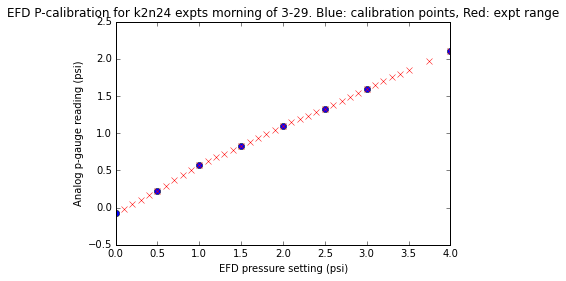

In [58]:
#In this cell, I'm correcting the pressures for the first k2n24 expt because it leaked...
#and I did not have the gauge yet.
#I went back and measured them with the 0-3psi gauge attached between the EFD and the leaky k2n24.
#The actual pressures are prob even a bit lower 
#than the gauge bc of flow.

from matplotlib import pyplot as plt
plt.plot(pset,pmeasured,'bo')
plt.hold('True')
plt.plot(k2n24Pressures,pcorr_k2n24,'rx')

plt.xlabel ('EFD pressure setting (psi)')
plt.ylabel('Analog p-gauge reading (psi)')
plt.title ('EFD P-calibration for k2n24 expts morning of 3-29. Blue: calibration points, Red: expt range')
xerrork2n24=0.26*np.ones((1,len(pcorr_k2n24))) #this is corrected pressure error in psi based on uncert of 0.5 on EFD panel
yerrork2n24=2*np.ones((1,len(k2n24Angles)))#my estimated uncert in reading the angle in degrees from a photo
xerrork2n24,yerrork2n24

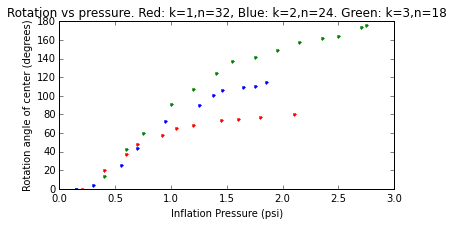

In [59]:
#Plot angle data with pressure values for the different systems
plt.figure(figsize=(6,3))
xerrork2n24=[0.05]*len(pcorr_k2n24)#*np.ones((1,len(pcorr_k2n24))) #this is corrected pressure error in psi based on uncert of 0.25 on EFD panel
yerrork2n24=[2]*len(k2n24Angles)#*np.ones((1,len(k2n24Angles)))#my estimated uncert in reading the angle in degrees from a photo
#plt.errorbar(pcorr_k2n24,k2n24Angles,yerror,xerror,ls='none')

#plt.plot(pcorr_k2n24,k2n24Angles,'bx') #I removed this trace, it was the first one before I had the pressure gauge
#It kinda goes to the same eventual angle as the other k=2 trace, that's great, but I am still 
#not sure I got the pressures right.
plt.hold('true')
plt.plot(k1n32Pressures,k1n32Angles,'r.')
plt.plot(k3n18Pressures,k3n18Angles,'g.')
plt.plot(k2n24s2Pressures,k2n24s2Angles,'b.')


#plt.xlim(xmin=0,xmax=125)
#plt.ylim(ymin=0,ymax=420)

plt.xlabel ('Inflation Pressure (psi)')
plt.ylabel('Rotation angle of center (degrees)')
plt.title ('Rotation vs pressure. Red: k=1,n=32, Blue: k=2,n=24. Green: k=3,n=18')

#plt.savefig('AngleVsPressure.eps')


In [60]:
#can put error bars on multi trace plot
#maybe can fill in the 1.1-1.2 region on the blue trace from a movie?

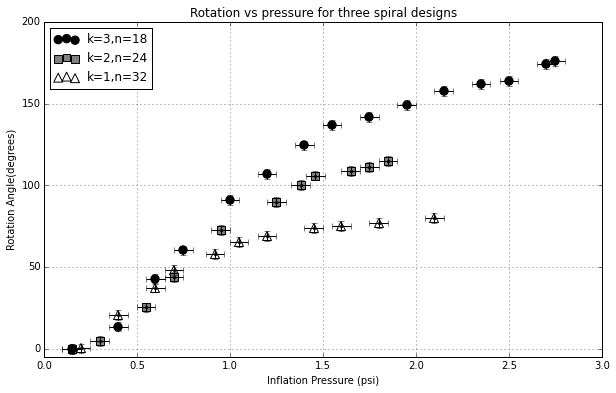

In [79]:
#Same data, fancier plot with error bars, fits, legend and symbols instead of colors
plt.figure(figsize=[10,6])

plt.hold('True')
#plt.plot(x1,y1,'k')  #possibly could do some fits and plot them here
#plt.plot(x2,y2,'k')
#plt.plot(x3,y3,'k')


#Create error bars for the three samples based on my estimated measurement uncertainty
xerrork1n32=[0.05]*len(k1n32Pressures) #this is corrected pressure error in psi based on uncert of 0.05 on gauge 
yerrork1n32=[3.0]*len(k1n32Angles)#my estimated uncert in reading the angle in degrees from a photo
xerrork2n24s2=[0.05]*len(k2n24s2Pressures) #this is corrected pressure error in psi based on uncert of 0.05 on gauge 
yerrork2n24s2=[3.0]*len(k2n24s2Angles)#my estimated uncert in reading the angle in degrees from a photo
xerrork3n18=[0.05]*len(k3n18Pressures) #this is corrected pressure error in psi based on uncert of 0.05 on gauge 
yerrork3n18=[3.0]*len(k3n18Angles)#my estimated uncert in reading the angle in degrees from a photo

#add data with symbols that will print ok in black/white
#gahhhh I have to plot the error bars and THEN the markers
plt.errorbar(k1n32Pressures,k1n32Angles,yerrork1n32,xerrork1n32,'k.')
data_k1n32=plt.scatter(k1n32Pressures,k1n32Angles,marker='^',facecolor='white',label='k=1,n=32',s=80,linewidths=1.0)

plt.errorbar(k2n24s2Pressures,k2n24s2Angles,yerrork2n24s2,xerrork2n24s2,'k.')
data_k2n24s2=plt.scatter(k2n24s2Pressures,k2n24s2Angles,marker='s',facecolor='gray',label='k=2,n=24',s=60,linewidths=1.0)

plt.errorbar(k3n18Pressures,k3n18Angles,yerrork3n18,xerrork3n18,'k.')
data_k3n18=plt.scatter(k3n18Pressures,k3n18Angles,marker='o',facecolor='black',label='k=3,n=18',s=70,linewidths=1.0)

plt.xlabel('Inflation Pressure (psi)')
plt.ylabel('Rotation Angle(degrees)')
plt.title('Rotation vs pressure for three spiral designs')

axes = plt.gca()
axes.set_xlim([0,3.0])
axes.set_ylim([-5,200])
plt.grid(True)
plt.legend(handles=[data_k3n18,data_k2n24s2,data_k1n32],loc='upper left')
plt.savefig('RotationVPressure.eps')

In [92]:
#can a simple model can explain these curves--is a finite element simulation needed?

/Users/cindyharnett/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in arccos
  app.launch_new_instance()


(array([  0.1       ,   0.44137931,   0.78275862,   1.12413793,
          1.46551724,   1.80689655,   2.14827586,   2.48965517,
          2.83103448,   3.17241379,   3.5137931 ,   3.85517241,
          4.19655172,   4.53793103,   4.87931034,   5.22068966,
          5.56206897,   5.90344828,   6.24482759,   6.5862069 ,
          6.92758621,   7.26896552,   7.61034483,   7.95172414,
          8.29310345,   8.63448276,   8.97586207,   9.31724138,
          9.65862069,  10.        ]),
 [nan,
  nan,
  nan,
  25.940972469483775,
  58.055523431529551,
  69.631463008644502,
  75.745590622126599,
  79.436084074655284,
  81.84891225385482,
  83.516829437122269,
  84.719164416825208,
  85.61493124588641,
  86.300384171123142,
  86.83666754967561,
  87.264176225306215,
  87.61048309201594,
  87.89493780943053,
  88.13144699567259,
  88.330215083637484,
  88.498867914563093,
  88.643197380081034,
  88.767666575376197,
  88.875759676782423,
  88.970228823377923,
  89.053271268904254,
  89.1266584463